In [1]:
%load_ext processingpymat

In [2]:
%matplotlib nbagg

In [5]:
import sys
sys.path.append('Tankgame')

<IPython.core.display.Javascript object>


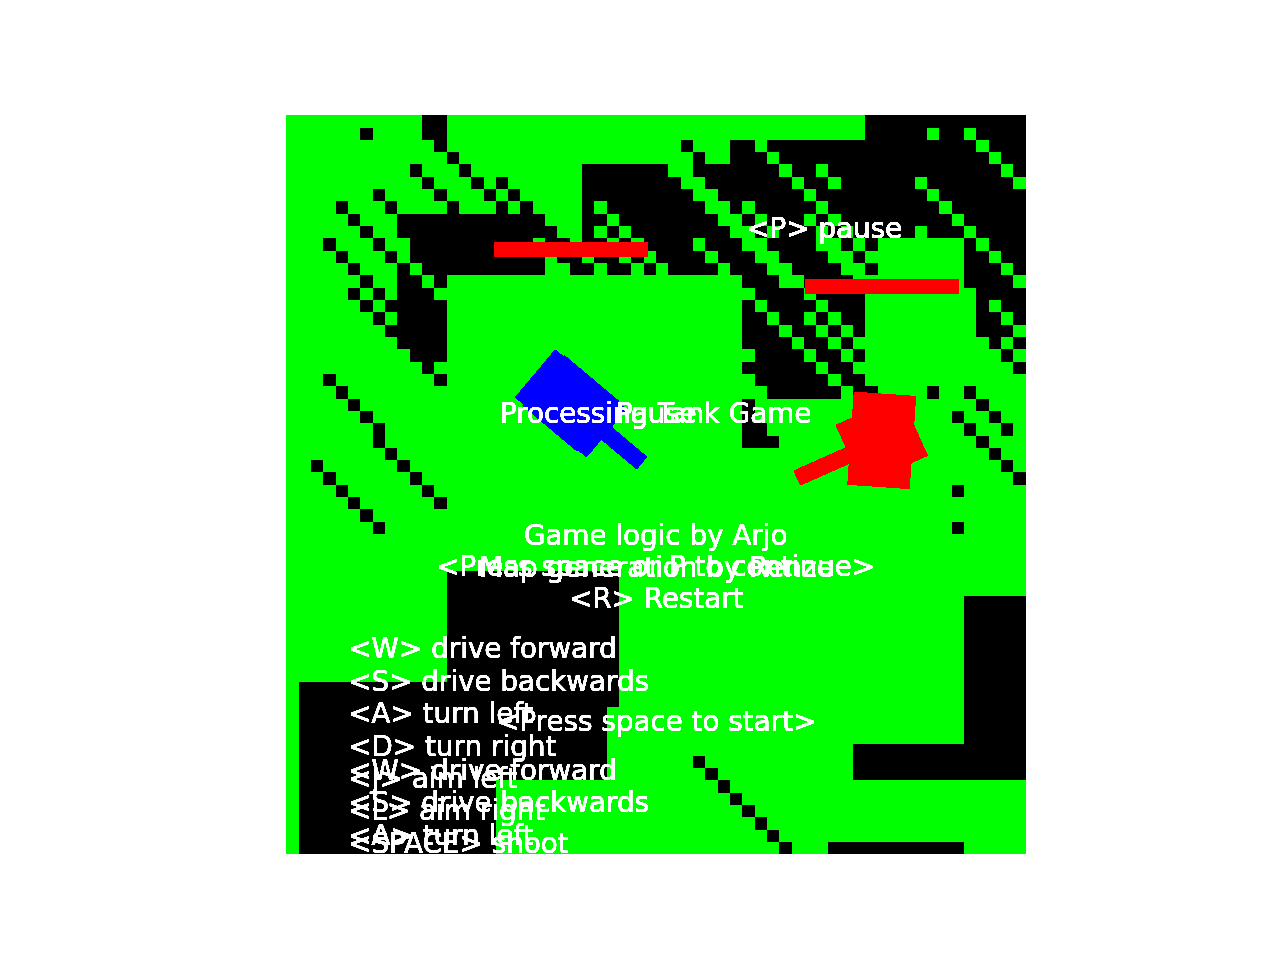

(<processingpymat.processing.Processing at 0x7f01541c7e10>,
 <matplotlib.animation.FuncAnimation at 0x7f015c070f10>)

In [7]:
%%processing skipframes=9
from world import World
from tank import Tank
from target import Target
from ai import AI
from ui import UI

bullets = []

def setup():
    global grid, target, world, tank, ai, enemies, ui

    size(240, 240, P2D)
    noSmooth()

    ui = UI()

    world = World(width, height, 4)
    world.create_grid()

    tank = Tank(100, 100, bullets, ui, True)
    world.destroy(90, 100, 100)

    ai = AI(10)

    enemy = Tank(150, 150, bullets, ui, False)
    world.destroy(80, 150, 150)

    #enemy2 = Tank(300, 400, bullets, ui, False)
    #world.destroy(100, 300, 400)

    #enemies = [enemy, enemy2]
    enemies = [enemy]

    noStroke()


def draw():
    global bullets, world, tank, ai, enemies, ui

    #background(200, 255, 100)
    background(0, 255, 0)


    world.render()

    if ui.state == ui.gameplay:
        tank.update(world)
    tank.render(False)

    for enemy in enemies:
        ai.move(enemy)
        if ui.state == ui.gameplay:
            enemy.update(world)
        enemy.render(False)


    for i, bullet in enumerate(bullets):

        destroy = False

        if bullet.x < 0 or bullet.x > width or bullet.y < 0 or bullet.y > height:
            destroy = True
        else:

            if bullet.x > tank.x-tank._height/2 and bullet.x < tank.x+tank._height/2 and bullet.y > tank.y-tank._height/2 and bullet.y < tank.y+tank._height/2:
                tank.hit()
                destroy = True

            for enemy in enemies:

                if bullet.x > enemy.x-enemy._height/2 and bullet.x < enemy.x+enemy._height/2 and bullet.y > enemy.y-enemy._height/2 and bullet.y < enemy.y+enemy._height/2:
                    enemy.hit()
                    destroy = True
                    continue


            if world.grid[int(bullet.y / world.cell_size)][int(bullet.x / world.cell_size)] == 1:

                world.destroy(int(random(20, 40)), int(bullet.x), int(bullet.y))
                destroy = True

        if destroy:
            bullets.pop(i)

        if ui.state == ui.gameplay:
            bullet.update()
        bullet.render()

    ui.render()

def keyPressed():
    if (key == 'a' or key == 'A'):
        tank.key_turn_left = True
    if (key == 'd' or key == 'D'):
        tank.key_turn_right = True
    if (key == 'j' or key == 'J'):
        tank.key_aim_left = True
    if (key == 'l' or key == 'L'):
        tank.key_aim_right = True
    if (key == 'w' or key == 'W'):
        tank.key_drive = True
    if (key == 's' or key == 'S'):
        tank.key_reverse = True
    if (key == ' '):
        tank.key_shoot = True
    if (key == 'k' or key == 'K'):
        tank.key_build = True

    if ui.state == ui.gamestart:
        if (key == ' '):
            ui.state = ui.gameplay
    elif ui.state == ui.gameplay:
        if (key == 'p' or key == 'P'):
            ui.state = ui.pause
    elif ui.state == ui.pause:
        if (key == ' ' or key == 'P' or key == 'p'):
            ui.state = ui.gameplay
        if (key == 'r' or key == 'R'):
            ui.state = ui.gamestart
            setup()
    elif ui.state == ui.gameover:
        if (key == ' '):
            ui.state = ui.gamestart
            setup()



def keyReleased():
    if (key == 'a' or key == 'A'):
        tank.key_turn_left = False
    if (key == 'd' or key == 'D'):
        tank.key_turn_right = False
    if (key == 'j' or key == 'J'):
        tank.key_aim_left = False
    if (key == 'l' or key == 'L'):
        tank.key_aim_right = False
    if (key == 'w' or key == 'W'):
        tank.key_drive = False
    if (key == 's' or key == 'S'):
        tank.key_reverse = False
    if (key == ' '):
        tank.key_shoot = False
    if (key == 'k' or key == 'K'):
        tank.key_build = False
